In [27]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [2]:
# load hormone data
hormone_morning = pd.read_csv('data_array_morning.csv')
hormone_afternoon = pd.read_csv('data_array_afternoon.csv')

In [29]:
# add time to hormone morning: it starts at 9:45 and every sample is 7.5 minutes. Only the time is needed, not the date.
hormone_morning['time'] = pd.date_range(start='09:45', periods=len(hormone_morning), freq='7.5min')
# add time to hormone afternoon: it starts at 14:27 and every sample is 7.5 minutes (Check!!)
hormone_afternoon['time'] = pd.date_range(start='14:22', periods=len(hormone_afternoon), freq='7.5min')

In [30]:
hormone_afternoon

,L-Cysteic_acid,Ethanolamine_phosphate,Glutamyl-gamma-Glutamic_acid,1-Methylhistidine,Cysteine,Arginine,Glutaminyl-Glutamic_acid,gamma-Glutamyl-Glycine,Asparagine,Creatine,...,Salsolinol_1-carboxylic_acid,Salsoline-1-carboxylic_acid,5_6-Dihydroxyindole,2-Naphthol,Kynuramine,4-Ethylphenol,4-(1_1_3_3-Tetramethylbutyl)-phenol,2_4-Dichlorophenol,Isomer_1_of_Resorcinol,time
0,-2.590104,-0.278874,0.235487,-1.646423,-0.305037,0.532743,0.190108,0.675339,1.277176,0.874024,...,2.598685,2.373963,-0.240357,-1.113477,1.301719,-1.484938,-0.230907,-1.275291,0.328862,2025-07-09 14:22:00
1,-1.507448,0.895390,0.937247,0.408879,1.564517,1.699188,1.290867,1.422877,2.344089,2.153854,...,2.006422,2.282739,0.816808,-1.113477,0.523559,-1.484938,-1.079495,-1.275291,0.168033,2025-07-09 14:29:30
2,0.733772,-0.505498,-0.439995,0.299753,0.127623,-0.701290,-0.573458,0.290479,0.083050,0.577751,...,0.038611,0.035068,1.273319,0.276053,-0.254601,0.043099,0.967764,-0.084634,0.966023,2025-07-09 14:37:00
3,0.879187,0.251785,0.609811,0.458817,0.205020,0.741572,0.627014,1.257383,1.139946,2.004540,...,0.847435,1.306289,0.670109,-0.334890,0.578246,-0.113026,-0.415302,-0.019613,0.504787,2025-07-09 14:44:30
4,0.234748,-1.105860,-1.515451,-1.410108,0.316303,-1.346698,-1.670037,-1.379571,-0.330592,-0.221820,...,0.304247,0.441251,1.114708,-0.599012,0.266281,-0.397475,0.768429,-0.172452,0.118615,2025-07-09 14:52:00
5,0.714426,-1.001932,-1.210551,-1.425338,0.704946,-0.410712,-0.920582,-1.341482,0.031682,-0.490285,...,0.395087,0.187758,1.795945,0.124159,-0.186867,0.114086,0.327799,0.251612,0.521838,2025-07-09 14:59:30
6,0.820034,-0.798847,-1.089390,-0.410600,0.215245,-0.696094,-0.641461,-1.309883,-0.642545,-0.812365,...,-0.409989,-0.388215,1.152216,0.280342,-0.530692,0.025942,0.676895,0.785398,1.035290,2025-07-09 15:07:00
7,-0.329062,-1.195713,-1.518923,-2.529922,-1.254090,-2.383279,-1.590836,-1.462749,-2.042290,-2.084369,...,-0.847283,-1.138094,0.817361,-0.302022,-2.771474,0.752509,1.181442,-0.008845,2.795362,2025-07-09 15:14:30
8,1.357780,-0.627821,0.121618,0.450513,0.072686,-0.603179,-0.088771,-1.012951,-0.819622,-0.717879,...,-1.170550,-1.446284,1.189281,0.967745,-1.602974,1.022112,1.882648,1.229421,0.579912,2025-07-09 15:22:00
9,0.874477,-0.704615,0.352473,-0.013656,-0.461416,-0.405713,0.135252,-1.086119,-0.504069,-1.353793,...,-0.681526,-1.066030,1.017042,0.913449,-0.434904,0.878765,-0.228430,1.043181,0.904992,2025-07-09 15:29:30


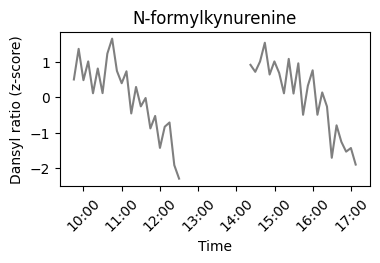

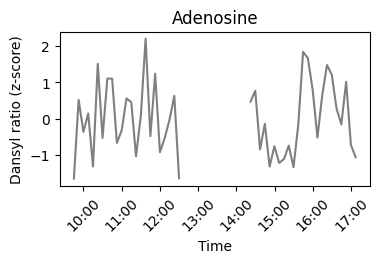

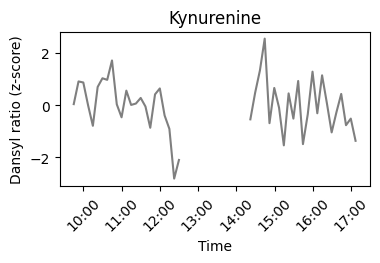

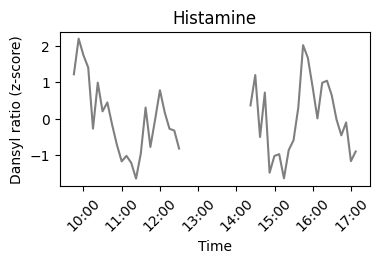

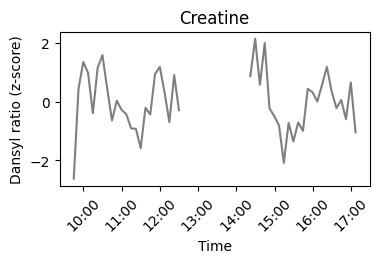

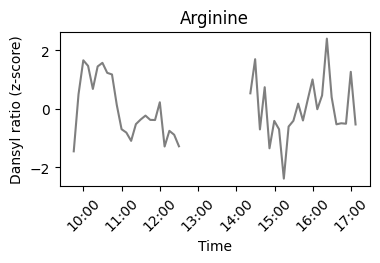

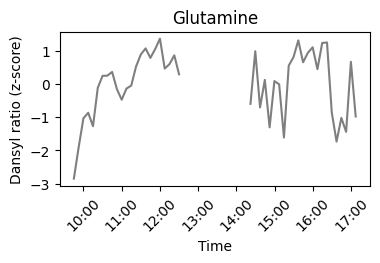

In [43]:
# plot in the same plot both morning and afternoon levels of gaba

for compound in ['N-formylkynurenine', 'Adenosine', 'Kynurenine', 'Histamine', 'Creatine', 'Arginine', 'Glutamine']:
    plt.figure(figsize=(4, 2))
    plt.plot(hormone_morning['time'], hormone_morning[compound], label='Morning ' + compound, color='k',alpha=0.5)
    plt.plot(hormone_afternoon['time'], hormone_afternoon[compound], label='Afternoon ' + compound,color='k',alpha=0.5)
    # Set the x-axis to show time only
    plt.xticks(rotation=45)
    # plt.gcf().autofmt_xdate()  # Auto-format the x-axis for better readability
    # Apply the time-only formatter
    myFmt = mdates.DateFormatter("%H:%M")
    plt.gca().xaxis.set_major_formatter(myFmt)
    plt.xlabel('Time')
    plt.ylabel('Dansyl ratio (z-score)')
    plt.title(compound)
    plt.show()

In [46]:
data_afternoon.shape

(23, 157)

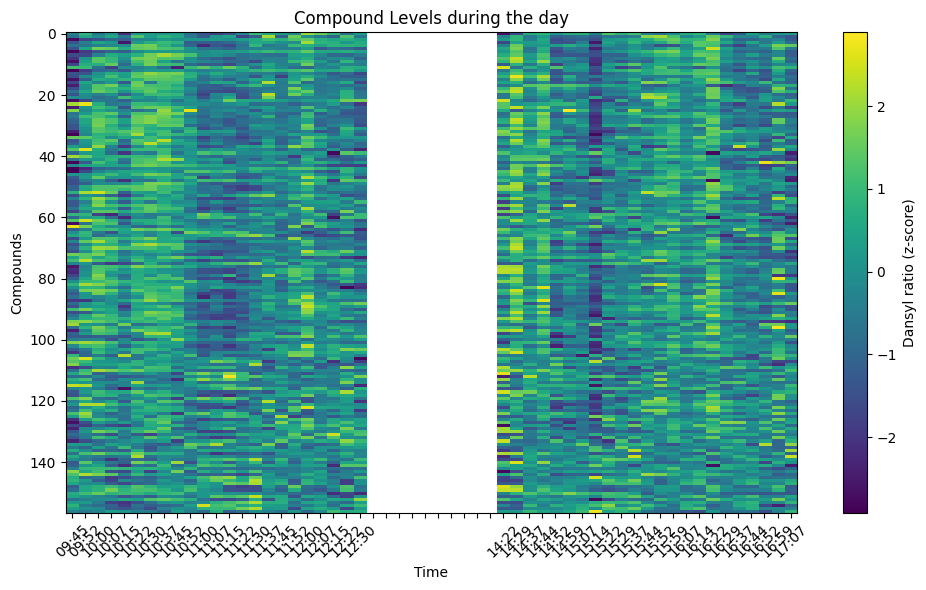

In [50]:
# plot all compounds in a heatmap, with the time on the x-axis and the compounds on the y-axis
compounds = hormone_morning.columns[:-1]  # Exclude the 'time' column
data_morning = hormone_morning[compounds].values
data_afternoon = hormone_afternoon[compounds].values
data_combined = np.vstack((data_morning, np.zeros((10,157))*np.nan, data_afternoon)).T
plt.figure(figsize=(10, 6))
plt.imshow(data_combined, aspect='auto', cmap='viridis', interpolation='nearest')
plt.colorbar(label='Dansyl ratio (z-score)')
xtp = np.arange(len(hormone_morning['time']) + len(hormone_afternoon['time']) + 10)
plt.xticks(ticks=xtp, labels=np.concatenate((hormone_morning['time'].dt.strftime('%H:%M'), ['']*10, hormone_afternoon['time'].dt.strftime('%H:%M'))), rotation=45)
plt.xlabel('Time')
plt.ylabel('Compounds')
plt.title('Compound Levels during the day')
plt.tight_layout()
plt.show()